<h1><center> Statistiques Initiales

In [1]:
import pandas as pd
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kendalltau
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from scipy.stats import mannwhitneyu, kruskal
import numpy as np
import math
import scipy.stats

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import des données :
df = pd.read_csv( "/content/drive/MyDrive/AI in Insurance/training.csv", sep=';')
df.head()

,PolNum,CalYear,Gender,Type,Category,Occupation,Age,Group1,Bonus,Poldur,Value,Adind,SubGroup2,Group2,Density,Exppdays,Numtppd,Numtpbi,Indtppd,Indtpbi
1,200114978,2009,Male,C,Large,Employed,25,18,90,3,15080,0,L46,L,72.012883,365,1,0,0.0,0.0
2,200114994,2009,Male,E,Large,Employed,20,11,30,2,22370,1,O38,O,39.550411,365,1,0,0.0,0.0
3,200115001,2009,Female,E,Large,Unemployed,42,11,150,0,39650,0,Q28,Q,169.529148,365,2,0,0.0,0.0
4,200115011,2009,Female,C,Medium,Housewife,21,5,0,0,12600,1,L6,L,58.894688,365,1,0,0.0,0.0
5,200115015,2009,Female,D,Large,Employed,33,12,30,10,9065,0,N4,N,109.631885,365,2,0,0.0,0.0


In [4]:
print(df.describe())

             PolNum        CalYear            Age         Group1  \
count  1.000210e+05  100021.000000  100021.000000  100021.000000   
mean   2.002003e+08    2009.499895      41.122514      10.692625   
std    6.217239e+04       0.500002      14.299349       4.687286   
min    2.001149e+08    2009.000000      18.000000       1.000000   
25%    2.001399e+08    2009.000000      30.000000       7.000000   
50%    2.001649e+08    2009.000000      40.000000      11.000000   
75%    2.002608e+08    2010.000000      51.000000      14.000000   
max    2.002858e+08    2010.000000      75.000000      20.000000   

               Bonus         Poldur          Value          Adind  \
count  100021.000000  100021.000000  100021.000000  100021.000000   
mean       -6.921646       5.470781   16454.675268       0.512142   
std        48.633165       4.591194   10506.742732       0.499855   
min       -50.000000       0.000000    1000.000000       0.000000   
25%       -40.000000       1.000000    838

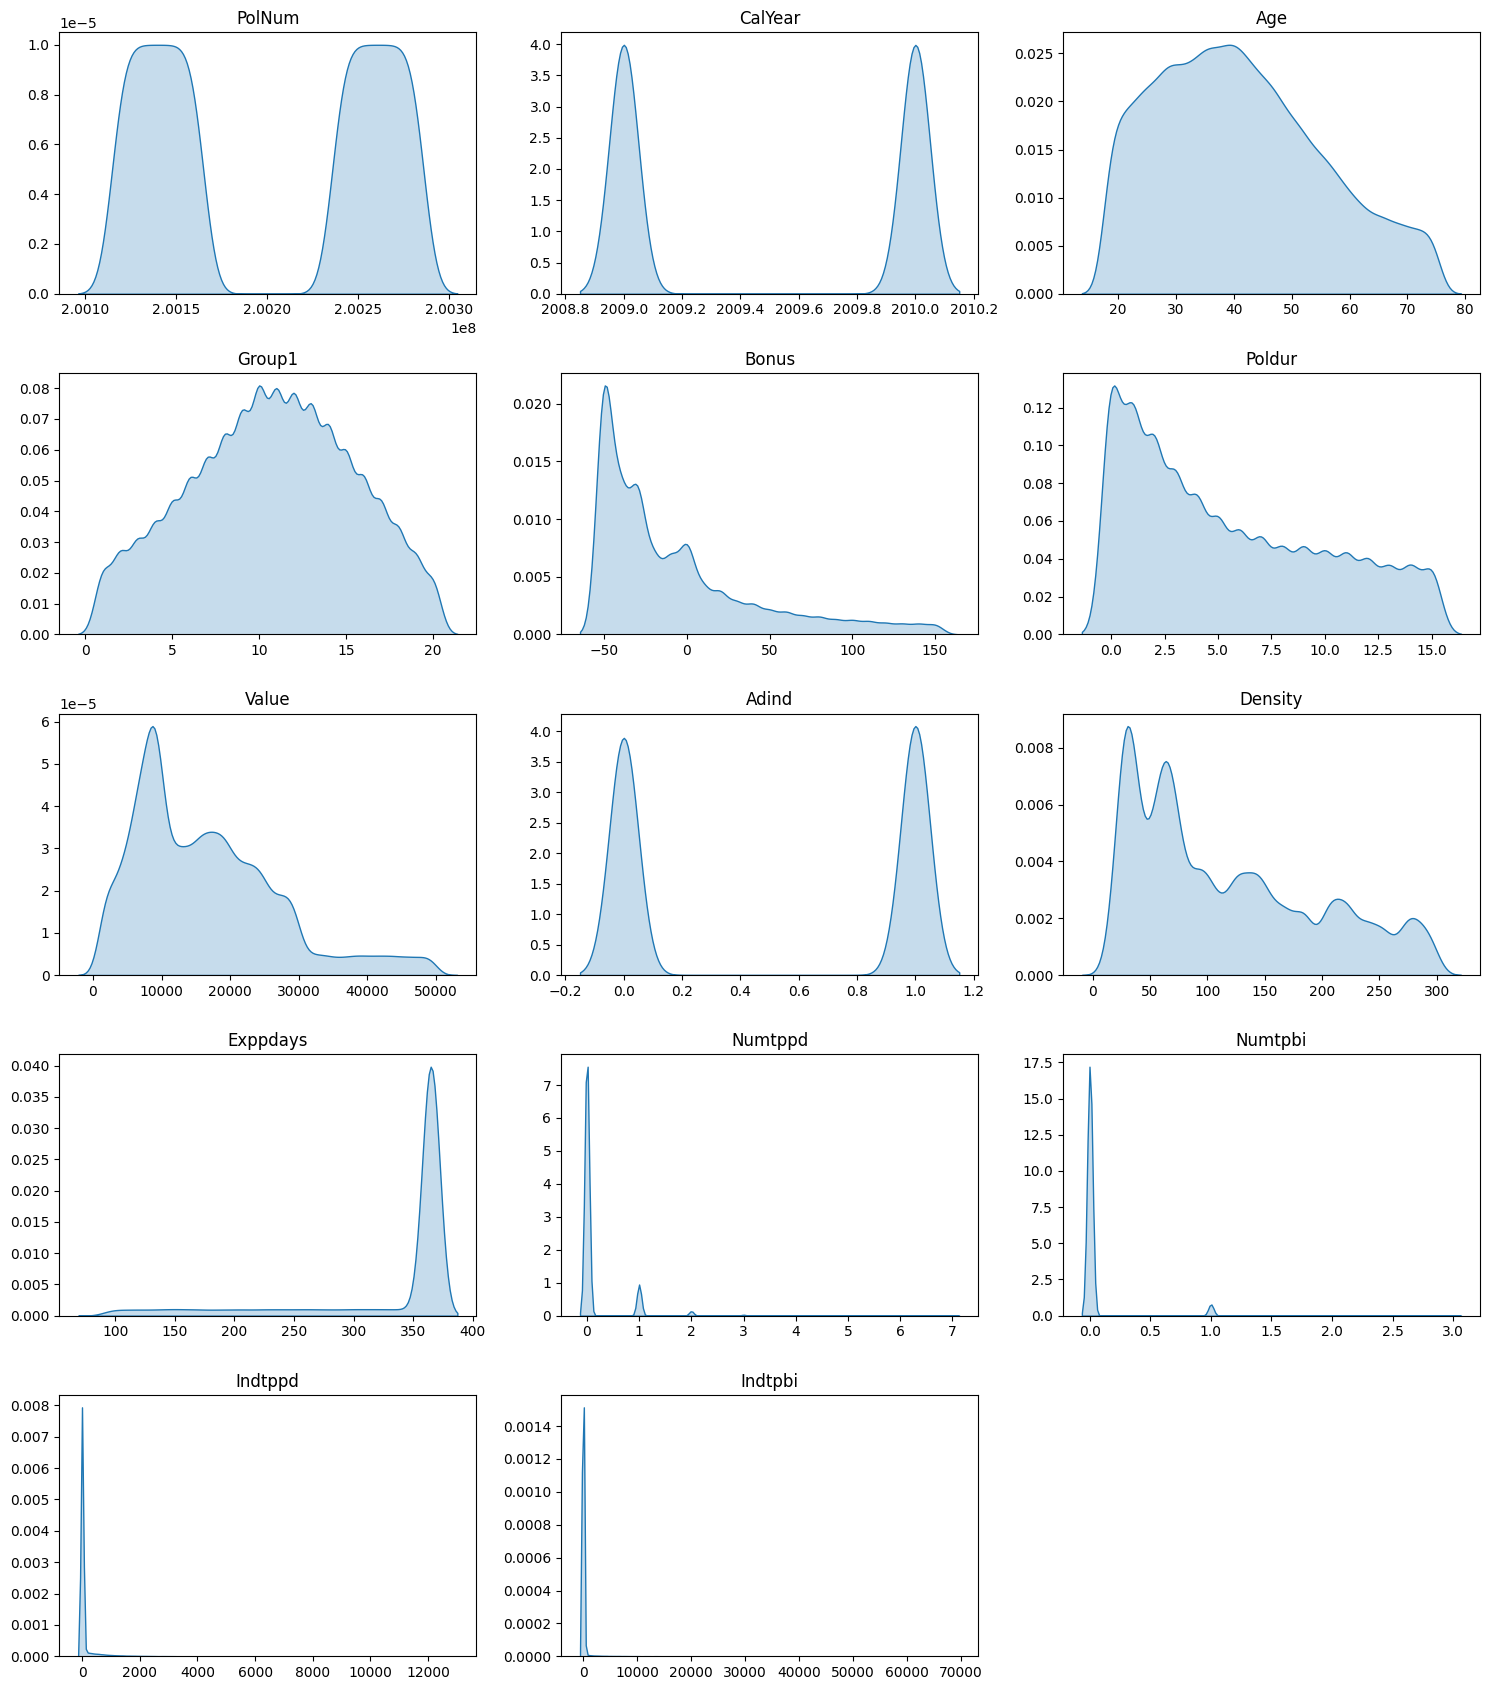

In [5]:
# Determine continuous variables
numerical_vars = df.select_dtypes(include=[np.number]).columns.tolist()

# Plot KDE plots for continuous variables
plt.figure(figsize=(15, 17))
for c, var in enumerate(numerical_vars):
    plt.subplot(5, 3, c+1)
    sns.kdeplot(data=df, x=var, fill=True)
    plt.title(str(var))
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout()
plt.show()

Interpretations :

PolNum: Have a bimodal distribution with two distinct peaks. This could indicate two different groups within the dataset (which are the groups in 2009 and 2010).

CalYear: This distribution is also bimodal, which might suggest two different periods in which data was collect (which are the years 2009 and 2010t.

Age: Shows a distribution that at skewed to tleftght, indicating a younger population, with fewer older individ (between 30 and 50 years old approls.

Group1: The distribution is roughlyngularhaped, possibly indicating a uniform distribution across the range, with a peak a centerthe (peak corresponds to the group of cars for which we have the highest number of contr.tory)

Bonus: This plot shleft right skew, indicating that bonuses are tyynts) y (discounts) lower with a few larger bonuses bein g lesscommon.

Poldur: lefher right-skewed distribution, implying that shorter policy durations are more commonn than loger ones.

Value: Exhibileftlong right tail, indicating a concentration of lower values with some highaer values s outliers. Highly skewed to the right, suggesting that most of the expected days are very low with a few extreme values.reme values.

Adind: This variable has a bimodal distribution with two peaks at the extremes and a lower density in the middle, which might suggest two dior behaviors in the data.s in the daShows several peaks and a left skew, which could imply multiple modes of density within the dataset.hthin the dataset.

Numtppd: Another highly skewed distribution with most of the data lowest values (at the beginning)rated at the low end.

high p: Shows a verwest values at the beginningep peak at the low end, indicating that most values are near zero, with a long tail suggesting outliers.

Indtpd: Shows a concentration of values near zero, with a s Shows a very high peak at the lowest values at the beginning, indicating that most values are near zero, with a long tail suggesting outliers.centration at the low end.low end.ration at the low end.

# Analyse Bivariée

Certains tests statistiques seront exclus dans notre étude comme le test de Pearson dans les analyses de corrélation, le test de Student (t-test) et le test ANOVA dans les analyses d'association. En effet, il a été demontré précédemment avec le test de Shapiro que toutes les variables quantitatives concernées ne sont pas normalement distribuées.

On se tournera donc vers d'autres tests:

* les tests de corrélation de Spearman et de Kendall
* le test de Chi-carré, et le coefficient de Cramer-V

# **1. Variables Cibles**

A. Varaibles quantitatives & variables catégorielles sous format numérique

Correlation Spearman et Kendall

**Avec Indtppd**

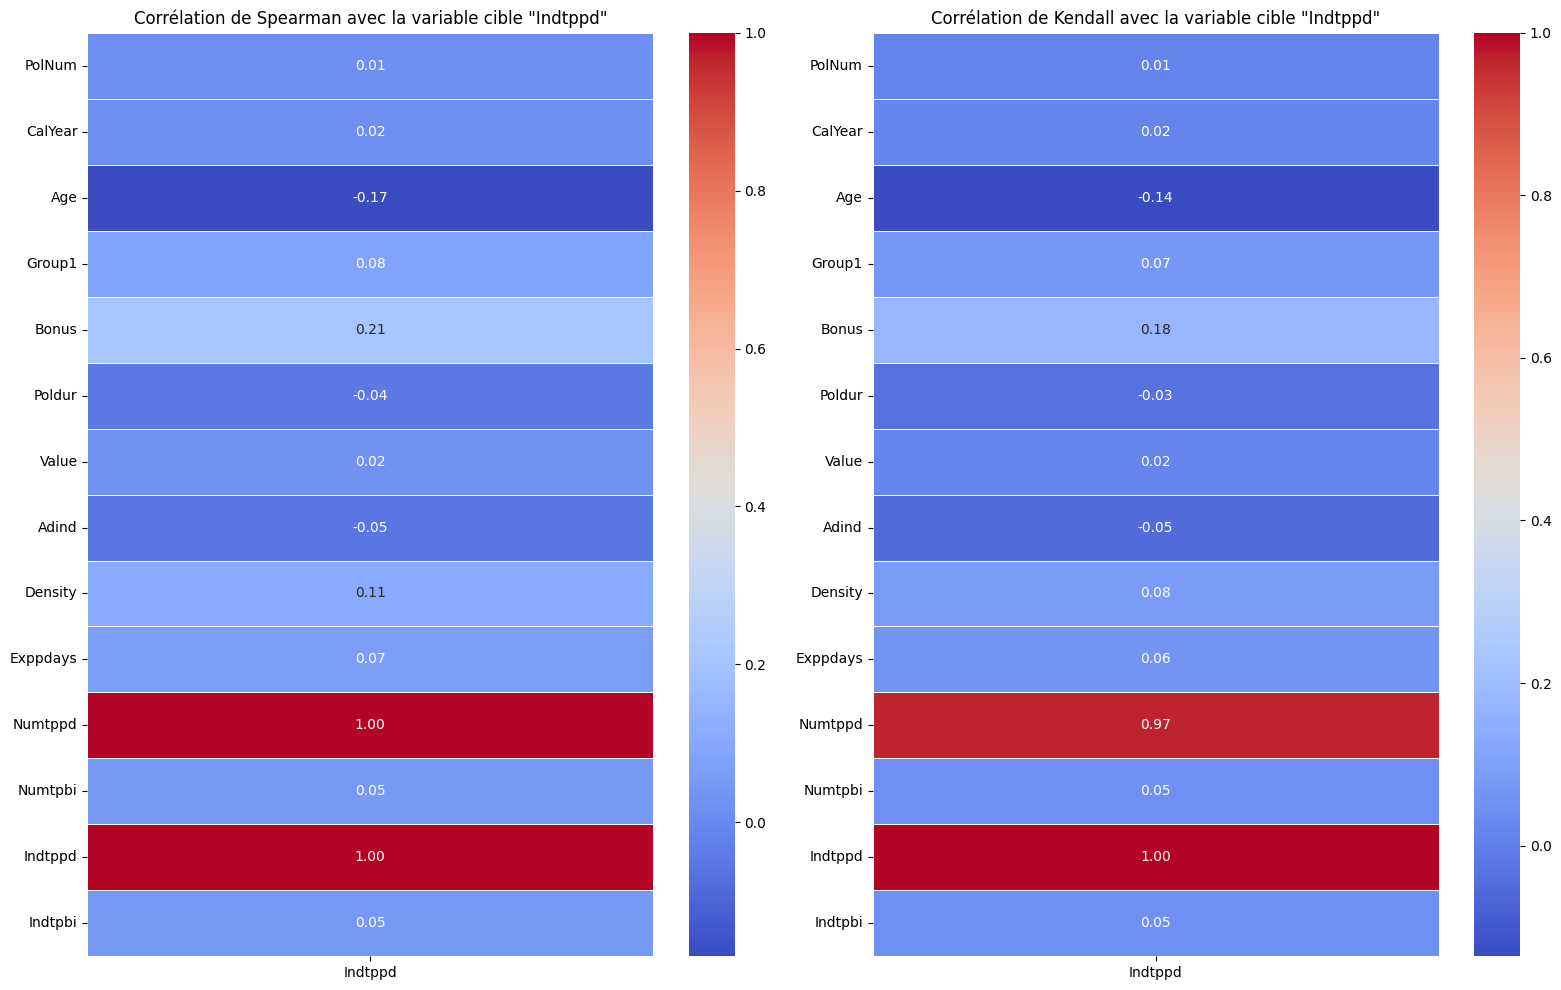

In [ ]:
numeric_columns = df.select_dtypes(include='number')

correlation_matrix_spearman, _ = spearmanr(numeric_columns)
correlation_Indtppd = correlation_matrix_spearman[numeric_columns.columns == 'Indtppd']


correlation_matrix_kendall = numeric_columns.corr(method='kendall')
correlation_Indtppd_kendall = correlation_matrix_kendall.loc[['Indtppd']]


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 10))

sns.heatmap(correlation_Indtppd.T, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f", xticklabels=['Indtppd'], yticklabels=numeric_columns.columns, ax=axes[0])
axes[0].set_title('Corrélation de Spearman avec la variable cible "Indtppd"')


sns.heatmap(correlation_Indtppd_kendall.T, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f", xticklabels=['Indtppd'], yticklabels=numeric_columns.columns, ax=axes[1])
axes[1].set_title('Corrélation de Kendall avec la variable cible "Indtppd"')
plt.tight_layout()
plt.show()

* **Age**: Avec Spearman, nous avons une corrélation négative de -0.17 et avec Kendall de -0.14, ce qui suggère que l'âge du conducteur est faiblement inversément lié au coût total des sinistres matériels tiers. Autrement dit, à mesure que l'âge augmente, le coût des sinistres a tendance à diminuer légèrement.

* **Bonus**: Ici, nous voyons une corrélation positive de 0.21 (Spearman) et 0.18 (Kendall), indiquant un lien faible mais positif. Cela pourrait signifier que les conducteurs avec un meilleur score bonus-malus (moins de sinistres dans le passé) sont susceptibles de voir un coût total des sinistres plus élevé, ce qui est un peu contre-intuitif et pourrait mériter une enquête plus approfondie.

* **Density**: Avec des coefficients de 0.11 (Spearman) et 0.08 (Kendall), la densité de population a un lien positif très faible avec le coût des sinistres. On pourrait supposer que dans les zones plus denses, il pourrait y avoir plus d'accidents, mais ce lien est faible.

* **Numtppd**: C'est la variable avec la corrélation la plus forte, comme prévu, car elle représente le nombre de sinistres matériels tiers, avec un coefficient parfait de 1.00 pour Spearman et 0.97 pour Kendall. Cela indique une relation directe et très forte - plus il y a de sinistres, plus le coût total est élevé.

Les autres variables affichent des corrélations très faibles, souvent près de zéro, ce qui indique qu'elles ont peu ou pas de lien linéaire avec le coût des sinistres matériels tiers selon ces tests. Cela ne signifie pas qu'elles ne sont pas importantes, mais peut-être que leur relation avec la variable cible n'est pas linéaire ou est influencée par d'autres facteurs.

**Avec Numtppd**

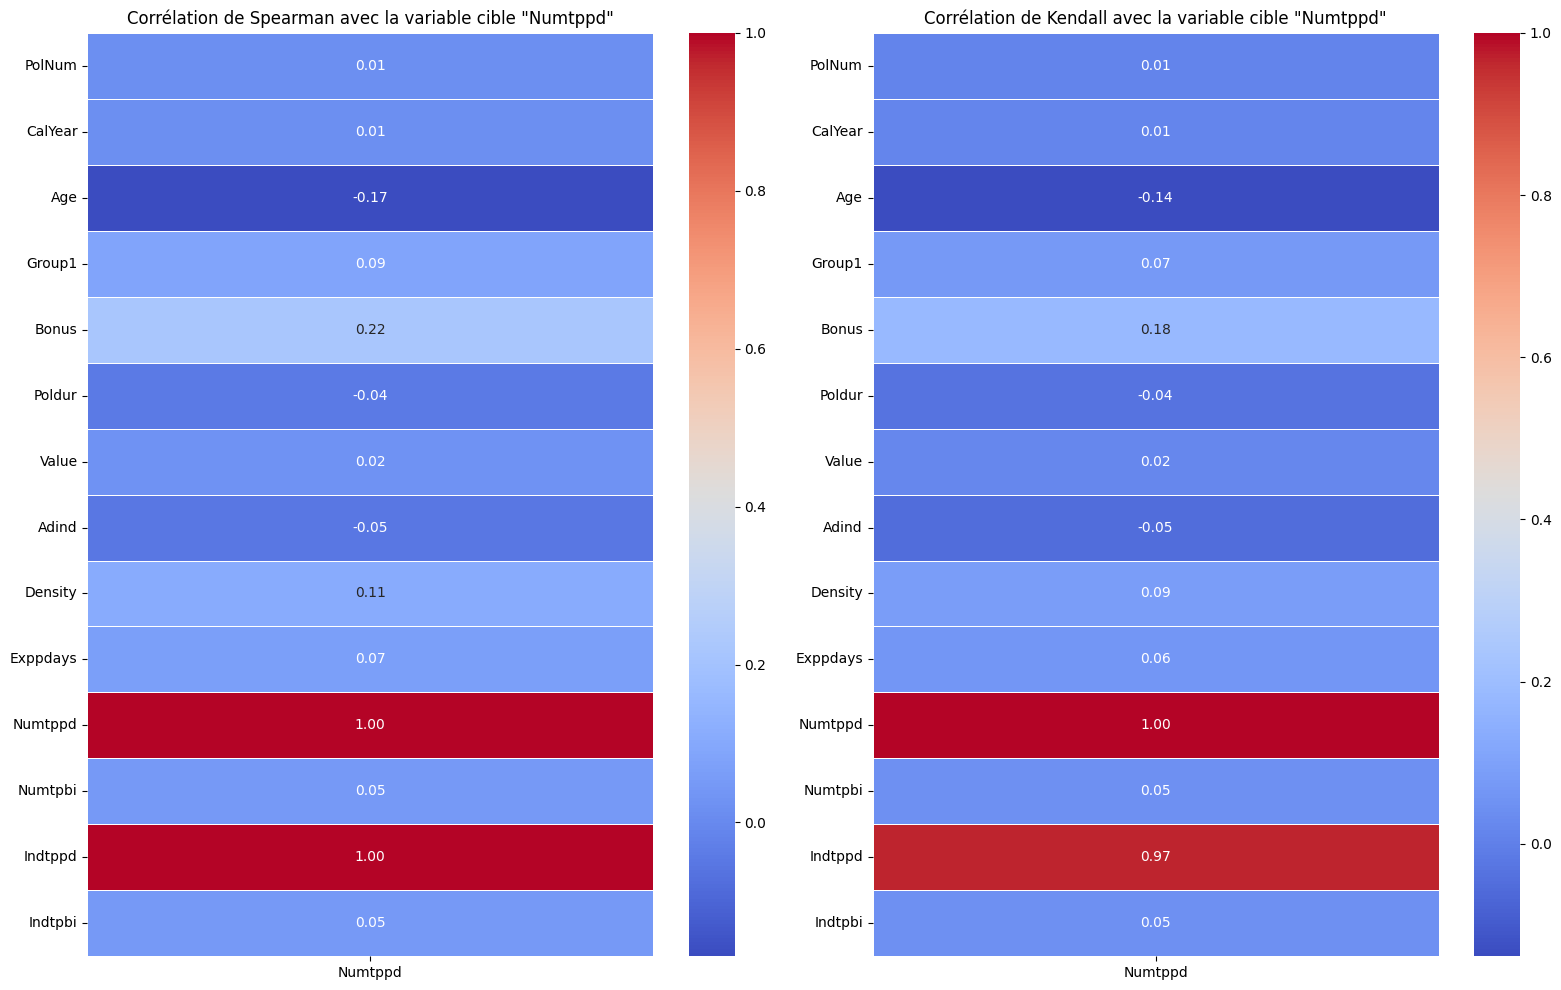

In [ ]:
numeric_columns = df.select_dtypes(include='number')

correlation_matrix_spearman, _ = spearmanr(numeric_columns)
correlation_Numtppd = correlation_matrix_spearman[numeric_columns.columns == 'Numtppd']


correlation_matrix_kendall = numeric_columns.corr(method='kendall')
correlation_Numtppd_kendall = correlation_matrix_kendall.loc[['Numtppd']]


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 10))

sns.heatmap(correlation_Numtppd.T, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f", xticklabels=['Numtppd'], yticklabels=numeric_columns.columns, ax=axes[0])
axes[0].set_title('Corrélation de Spearman avec la variable cible "Numtppd"')


sns.heatmap(correlation_Numtppd_kendall.T, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f", xticklabels=['Numtppd'], yticklabels=numeric_columns.columns, ax=axes[1])
axes[1].set_title('Corrélation de Kendall avec la variable cible "Numtppd"')
plt.tight_layout()
plt.show()

**Age**: La corrélation reste faiblement négative avec -0.17 pour Spearman et -0.14 pour Kendall, suggérant que les conducteurs plus âgés déclarent moins de sinistres matériels tiers.

**Bonus**: Avec une corrélation positive de 0.22 (Spearman) et 0.18 (Kendall), cela indique que les conducteurs avec un meilleur bonus (moins de sinistres dans le passé) tendent à avoir un nombre légèrement plus élevé de sinistres matériels tiers. Cela peut sembler paradoxal et pourrait indiquer que la variable bonus ne capture pas entièrement le risque de sinistre futur ou qu'il existe un biais dans la façon dont les bonus sont attribués.

**Density**: La densité de population montre une corrélation positive très faible avec les valeurs de 0.11 pour Spearman et 0.09 pour Kendall. Cela peut signifier qu'il y a une légère augmentation des sinistres matériels dans les zones plus peuplées, mais cette relation est très légère.

**Indtppd**: Comme prévu, cette variable a une corrélation parfaite avec "Numtppd" puisqu'elle représente probablement une mesure financière directement liée au nombre de sinistres matériels tiers.

*Les autres variables montrent des corrélations très faibles, souvent proches de zéro, suggérant qu'elles ont peu ou pas de relation directe avec le nombre de sinistres matériels tiers. Cela peut être dû à la nature complexe et multivariée du risque d'assurance, où de nombreux facteurs interagissent de manière non linéaire ou à travers des effets de seuil qui ne sont pas capturés par des corrélations linéaires simples.*


**Avec Indtbpi**

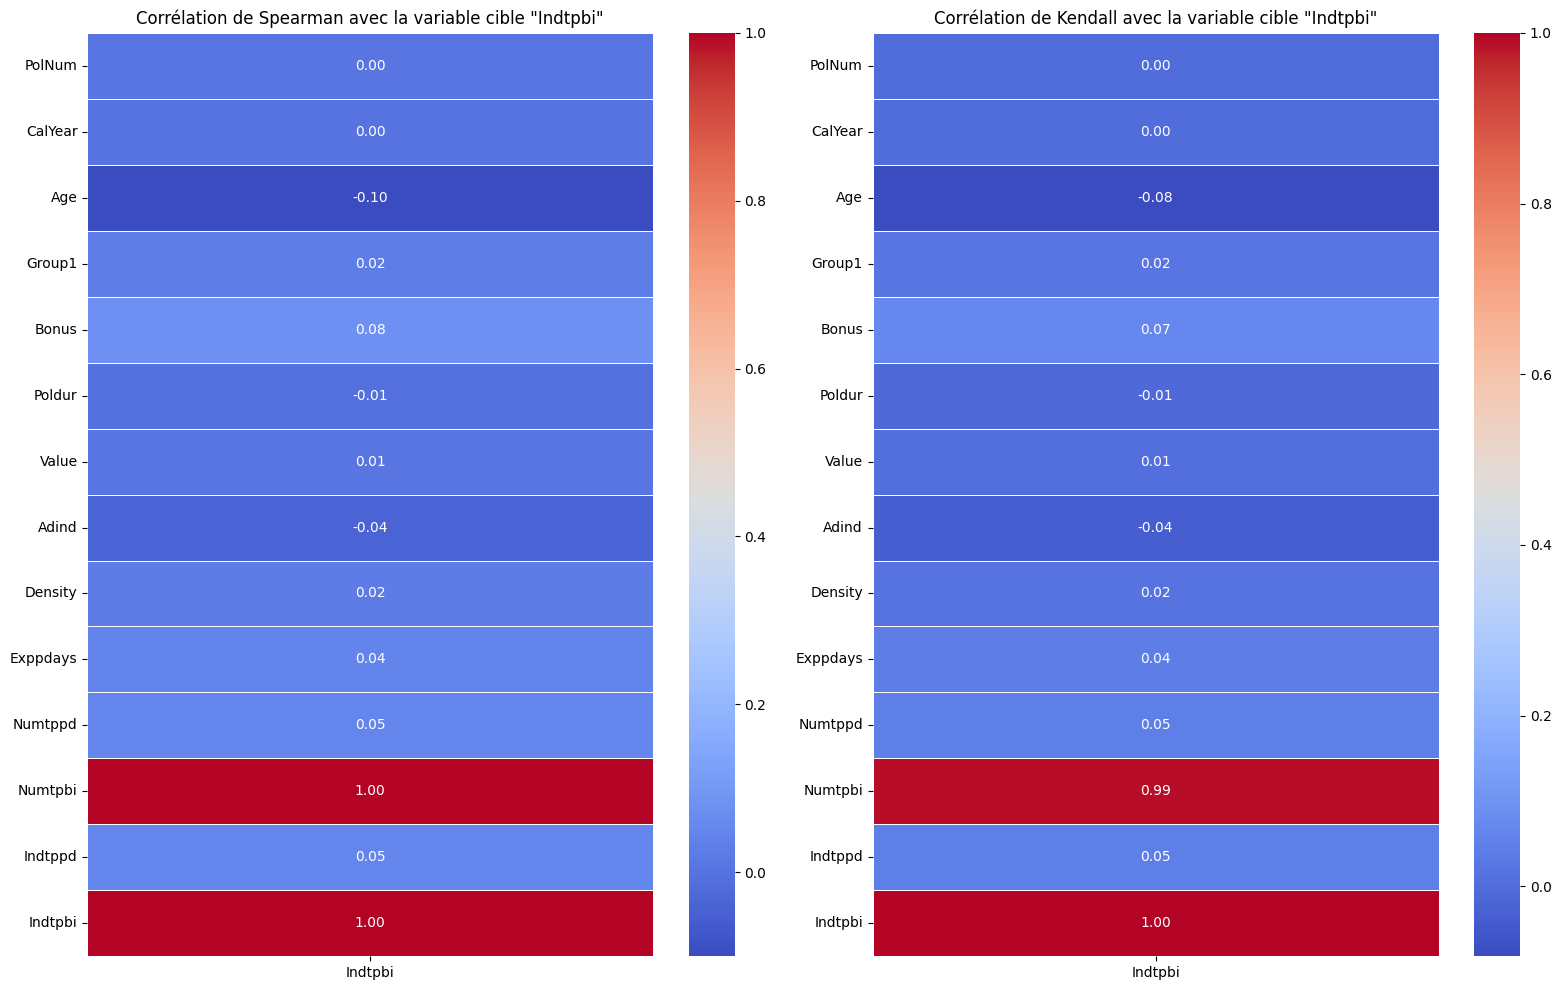

In [ ]:
numeric_columns = df.select_dtypes(include='number')

correlation_matrix_spearman, _ = spearmanr(numeric_columns)
correlation_Indtpbi = correlation_matrix_spearman[numeric_columns.columns == 'Indtpbi']


correlation_matrix_kendall = numeric_columns.corr(method='kendall')
correlation_Indtpbi_kendall = correlation_matrix_kendall.loc[['Indtpbi']]


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 10))

sns.heatmap(correlation_Indtpbi.T, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f", xticklabels=['Indtpbi'], yticklabels=numeric_columns.columns, ax=axes[0])
axes[0].set_title('Corrélation de Spearman avec la variable cible "Indtpbi"')


sns.heatmap(correlation_Indtpbi_kendall.T, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f", xticklabels=['Indtpbi'], yticklabels=numeric_columns.columns, ax=axes[1])
axes[1].set_title('Corrélation de Kendall avec la variable cible "Indtpbi"')
plt.tight_layout()
plt.show()

**Age**: La corrélation est faiblement négative à **-0.10** pour Spearman et **-0.08** pour Kendall. Cela suggère que l'âge du conducteur a un effet très faible, mais néanmoins négatif, sur le coût total des sinistres corporels tiers.

**Bonus**: Avec des corrélations de **0.08** (Spearman) et **0.07** (Kendall), on note une très faible relation positive. Cela peut indiquer que les conducteurs avec un meilleur bonus, c'est-à-dire moins de sinistres dans le passé, pourraient avoir un léger impact sur l'augmentation des coûts des sinistres corporels, mais cette relation est si faible qu'elle pourrait ne pas être significative.

**Density**: La densité de population a une corrélation presque nulle avec les valeurs de **0.02** pour Spearman et Kendall. Cela suggère qu'il n'y a pratiquement aucun lien entre la densité de la population où vit le conducteur et le coût des sinistres corporels.

**Numtppd** et **Numtbpi**: Ces variables montrent de très faibles corrélations avec "Indtbpi" (**0.05** pour Spearman et **0.05/0.04** pour Kendall), ce qui est surprenant, car on s'attendrait à une relation plus forte entre le nombre de sinistres et leur coût.

**Indtppd**: Il y a aussi une corrélation très faible avec "Indtbpi" (**0.05** pour Spearman et Kendall), suggérant qu'il n'y a pas de relation significative entre le coût des sinistres matériels et corporels tiers.

*Les très faibles corrélations observées pour "Indtbpi" avec d'autres variables pourraient suggérer que le coût des sinistres corporels est influencé par des facteurs non capturés dans les données existantes ou que ces coûts sont résultants d'événements rares et variables qui ne se prêtent pas bien à une analyse de corrélation linéaire simple. Des analyses de données plus avancées, peut-être incluant des variables catégorielles ou des modèles statistiques qui tiennent compte des événements rares, pourraient être nécessaires pour mieux comprendre les déterminants des coûts des sinistres corporels.*


**Avec Numtbpi**

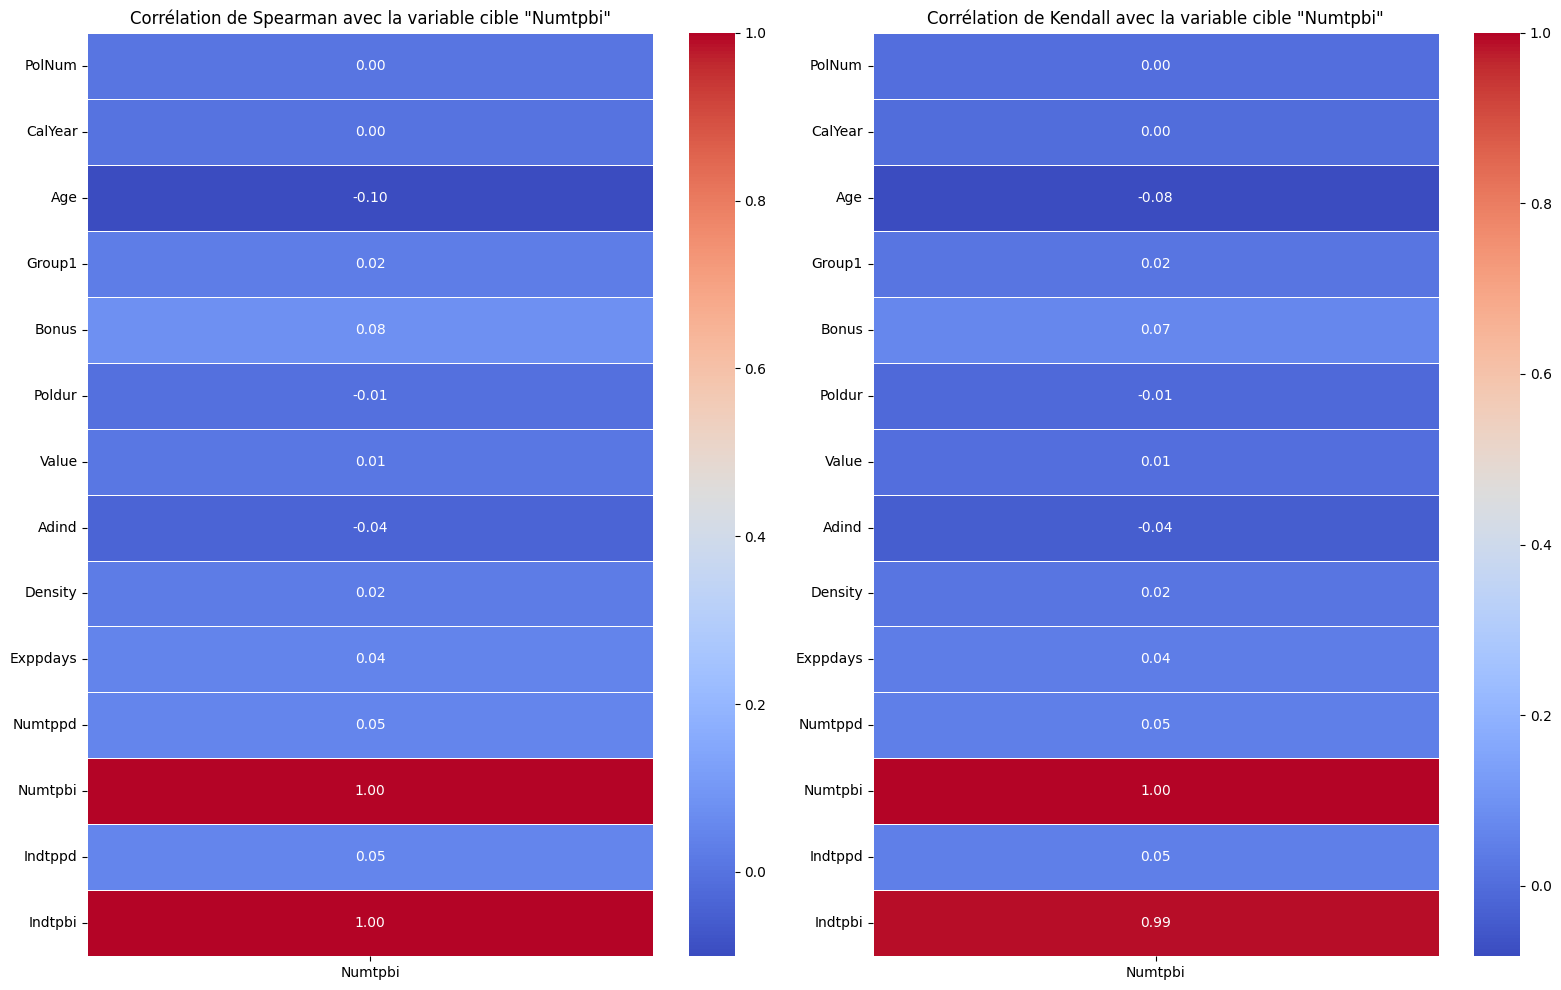

In [ ]:
numeric_columns = df.select_dtypes(include='number')

correlation_matrix_spearman, _ = spearmanr(numeric_columns)
correlation_Numtpbi = correlation_matrix_spearman[numeric_columns.columns == 'Numtpbi']


correlation_matrix_kendall = numeric_columns.corr(method='kendall')
correlation_Numtpbi_kendall = correlation_matrix_kendall.loc[['Numtpbi']]


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 10))

sns.heatmap(correlation_Numtpbi.T, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f", xticklabels=['Numtpbi'], yticklabels=numeric_columns.columns, ax=axes[0])
axes[0].set_title('Corrélation de Spearman avec la variable cible "Numtpbi"')


sns.heatmap(correlation_Numtpbi_kendall.T, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f", xticklabels=['Numtpbi'], yticklabels=numeric_columns.columns, ax=axes[1])
axes[1].set_title('Corrélation de Kendall avec la variable cible "Numtpbi"')
plt.tight_layout()
plt.show()

**Numtbpi - Nombre de sinistres corporels tiers**

- **PolNum et CalYear**: Aucune corrélation avec "Numtbpi" (**0.00** pour Spearman et Kendall), indiquant que le numéro de contrat et l'année de souscription n'influencent pas le nombre de sinistres corporels.

- **Age**: Corrélation négative faible (**-0.10** pour Spearman, **-0.08** pour Kendall), ce qui suggère que les conducteurs plus âgés pourraient être impliqués dans moins de sinistres corporels.

- **Group1**: Très faible corrélation positive (**0.02** pour Spearman et Kendall), indiquant peu ou pas de lien entre le groupe de voiture et le nombre de sinistres corporels.

- **Bonus**: Faible corrélation positive (**0.08** pour Spearman, **0.07** pour Kendall), suggérant que les conducteurs avec un meilleur score de bonus-malus ont légèrement plus de sinistres corporels.

- **Poldur**: Corrélation presque nulle (**-0.01** pour Spearman et Kendall), indiquant que la durée de la police d'assurance n'est pas liée au nombre de sinistres corporels.

- **Value**: Corrélation négligeable (**0.01** pour Spearman et Kendall), indiquant que la valeur du véhicule assuré n'a pas d'impact significatif sur le nombre de sinistres corporels.

- **Adind**: Légère corrélation négative (**-0.04** pour Spearman et Kendall), suggérant un très faible impact de l'indicateur de couverture matérielle sur le nombre de sinistres corporels.

- **Density**: Très faible corrélation positive (**0.02** pour Spearman et Kendall), indiquant un lien quasi inexistant entre la densité de population et le nombre de sinistres corporels.

- **Expdays**: Faible corrélation positive (**0.04** pour Spearman et Kendall), suggérant que l'exposition au risque (en jours) n'a qu'une influence mineure sur le nombre de sinistres corporels.

- **Numtppd**: Corrélation très faible avec "Numtbpi" (**0.05** pour Spearman, **0.05** pour Kendall), ce qui peut paraître surprenant étant donné qu'on pourrait s'attendre à ce que le nombre de sinistres matériels et corporels soient quelque peu liés.

- **Indtppd**: Corrélation très faible (**0.05** pour Spearman et Kendall), montrant qu'il n'y a pas de relation directe entre les coûts des sinistres matériels et le nombre de sinistres corporels.

*La faible corrélation de la plupart des variables avec "Numtbpi" pourrait indiquer que des facteurs non observés dans les données actuelles jouent un rôle dans le nombre de sinistres corporels, ou que ces sinistres sont rares et varient considérablement, rendant difficile la détection de tendances claires.*


# **B. Variables Qualitatives**

In [ ]:
# Qualitative variables
cat_data = df.select_dtypes(include=['object'])
cat_data_mod = []

for var in cat_data.columns:
    modalities = cat_data[var].astype(str).unique()
    count = len(modalities)
    cat_data_mod.append([var, count, np.sort(modalities)])

cat_data_mod = pd.DataFrame(cat_data_mod, columns=['Variable', 'Number of Modalities', 'Modalities'])
display(cat_data_mod)

,Variable,Number of Modalities,Modalities
0,Gender,2,"[Female, Male]"
1,Type,6,"[A, B, C, D, E, F]"
2,Category,3,"[Large, Medium, Small]"
3,Occupation,5,"[Employed, Housewife, Retired, Self-employed, ..."
4,SubGroup2,471,"[L1, L10, L100, L101, L102, L103, L104, L105, ..."
5,Group2,10,"[L, M, N, O, P, Q, R, S, T, U]"


In [ ]:
df.describe(include= ['O'])

,Gender,Type,Category,Occupation,SubGroup2,Group2
count,100021,100021,100021,100021,100021,100021
unique,2,6,3,5,471,10
top,Male,A,Medium,Employed,Q29,L
freq,63443,27760,36644,31150,431,23733


**Analysis of the categorical variables vs target variables**

Indtppd

In [8]:
# Select categorical variables
categorical_vars = ['Gender', 'Type', 'Category', 'Occupation', 'Group2']
target_variable = 'Indtppd'

# Loop through categorical variables
for var in categorical_vars:
    # Chi-squared test
    table = pd.crosstab(df[target_variable], df[var])
    chi2_stat, p_value, _, _ = scipy.stats.chi2_contingency(table)
    print(f"Chi-squared test result for {var} and {target_variable}: p-value = {p_value}")

    # Cramer's V calculation
    cramer_v = np.sqrt(chi2_stat / len(df))
    print(f"Cramer's V for {var} and {target_variable}: {cramer_v}")

Chi-squared test result for Gender and Indtppd: p-value = 0.9999852228504844
Cramer's V for Gender and Indtppd: 0.34074257654356815
Chi-squared test result for Type and Indtppd: p-value = 1.9657530484875496e-22
Cramer's V for Type and Indtppd: 0.8044546021484624
Chi-squared test result for Category and Indtppd: p-value = 0.009206160555246697
Cramer's V for Category and Indtppd: 0.5003168995056578
Chi-squared test result for Occupation and Indtppd: p-value = 1.0
Cramer's V for Occupation and Indtppd: 0.6805705763894605
Chi-squared test result for Group2 and Indtppd: p-value = 1.0
Cramer's V for Group2 and Indtppd: 1.018671761882254


'Type' pourrait avoir une association significative et forte avec 'Indtppd', tandis que 'Category' a une association significative et modérée.
Pour 'Gender', 'Occupation' et 'Group2', les résultats ne montrent pas d'association significative, et les valeurs de Cramer's V pour 'Occupation' et 'Group2' nécessitent une révision du calcul ( Pour Occupation cela pourrait suggérer une erreur de calcul, car une p-value de 1 devrait normalement correspondre à un Cramér's V proche de 0 et pour Group 2, La p-value de 1 indique aucune association significative. Cependant, le Cramér's V est supérieur à 1, ce qui est impossible et indique une erreur de calcul, car le Cramér's V doit être compris entre 0 et 1. ) .

Indtpbi

In [15]:
#Analysis of the categorical variables vs potential target variables :

# Select categorical variables
categorical_vars = ['Gender', 'Type', 'Category', 'Occupation', 'Group2']
target_variable = 'Indtpbi'

# Loop through categorical variables
for var in categorical_vars:
    # Chi-squared test
    table = pd.crosstab(df[target_variable], df[var])
    chi2_stat, p_value, _, _ = scipy.stats.chi2_contingency(table)
    print(f"Chi-squared test result for {var} and {target_variable}: p-value = {p_value}")

    # Cramer's V calculation
    cramer_v = np.sqrt(chi2_stat / len(df))
    print(f"Cramer's V for {var} and {target_variable}: {cramer_v}")

Chi-squared test result for Gender and Indtpbi: p-value = 0.8934007138622158
Cramer's V for Gender and Indtpbi: 0.20941124866173572
Chi-squared test result for Type and Indtpbi: p-value = 0.44802267811822194
Cramer's V for Type and Indtpbi: 0.47478773727715157
Chi-squared test result for Category and Indtpbi: p-value = 0.04073179482604187
Cramer's V for Category and Indtpbi: 0.30399445159088456
Chi-squared test result for Occupation and Indtpbi: p-value = 0.9999999011104369
Cramer's V for Occupation and Indtpbi: 0.4128243203114816
Chi-squared test result for Group2 and Indtpbi: p-value = 0.9951087065940399
Cramer's V for Group2 and Indtpbi: 0.6308394778142368


 seule la variable 'Category' montre une association significative avec 'Indtpbi'. Les valeurs élevées de Cramér's V pour 'Occupation' et 'Group2', en dépit des p-values non significatives, suggèrent qu'il pourrait y avoir des effets ou des relations qui ne sont pas capturés par le test du chi-carré, ou que les valeurs de Cramér's V sont influencées par d'autres facteurs dans les données

Numtppd

In [16]:
#Analysis of the categorical variables vs potential target variables :

# Select categorical variables
categorical_vars = ['Gender', 'Type', 'Category', 'Occupation', 'Group2']
target_variable = 'Numtppd'

# Loop through categorical variables
for var in categorical_vars:
    # Chi-squared test
    table = pd.crosstab(df[target_variable], df[var])
    chi2_stat, p_value, _, _ = scipy.stats.chi2_contingency(table)
    print(f"Chi-squared test result for {var} and {target_variable}: p-value = {p_value}")

    # Cramer's V calculation
    cramer_v = np.sqrt(chi2_stat / len(df))
    print(f"Cramer's V for {var} and {target_variable}: {cramer_v}")

Chi-squared test result for Gender and Numtppd: p-value = 1.6596588043830577e-34
Cramer's V for Gender and Numtppd: 0.041899398182633434
Chi-squared test result for Type and Numtppd: p-value = 9.093776520322884e-30
Cramer's V for Type and Numtppd: 0.04752139926551525
Chi-squared test result for Category and Numtppd: p-value = 5.0251499524004094e-64
Cramer's V for Category and Numtppd: 0.05830734997078001
Chi-squared test result for Occupation and Numtppd: p-value = 2.4518997612445183e-293
Cramer's V for Occupation and Numtppd: 0.12140067066478495
Chi-squared test result for Group2 and Numtppd: p-value = 6.090049165824671e-224
Cramer's V for Group2 and Numtppd: 0.11263452363873523


toutes les variables catégorielles testées montrent une association statistiquement significative avec le nombre de réclamations matérielles tierces parties. Les valeurs de Cramér's V, bien que toutes faibles à modérées, suggèrent que ces associations ne sont pas particulièrement fortes

Numtpbi

In [17]:
#Analysis of the categorical variables vs potential target variables :

# Select categorical variables
categorical_vars = ['Gender', 'Type', 'Category', 'Occupation', 'Group2']
target_variable = 'Numtpbi'

# Loop through categorical variables
for var in categorical_vars:
    # Chi-squared test
    table = pd.crosstab(df[target_variable], df[var])
    chi2_stat, p_value, _, _ = scipy.stats.chi2_contingency(table)
    print(f"Chi-squared test result for {var} and {target_variable}: p-value = {p_value}")

    # Cramer's V calculation
    cramer_v = np.sqrt(chi2_stat / len(df))
    print(f"Cramer's V for {var} and {target_variable}: {cramer_v}")

Chi-squared test result for Gender and Numtpbi: p-value = 0.0014799111914403662
Cramer's V for Gender and Numtpbi: 0.012422650834269354
Chi-squared test result for Type and Numtpbi: p-value = 0.6568150015503211
Cramer's V for Type and Numtpbi: 0.011085711884076194
Chi-squared test result for Category and Numtpbi: p-value = 2.7707051967560194e-31
Cramer's V for Category and Numtpbi: 0.039598237399521376
Chi-squared test result for Occupation and Numtpbi: p-value = 4.589730734262118e-90
Cramer's V for Occupation and Numtpbi: 0.06753432756668383
Chi-squared test result for Group2 and Numtpbi: p-value = 1.2660428483855607e-06
Cramer's V for Group2 and Numtpbi: 0.027655809728535034


'Category' et 'Occupation' présentent les associations les plus significatives avec 'Numtpbi', même si dans l'ensemble, l'intensité de ces associations est faible à modérée. 'Gender' et 'Group2' présentent également des associations significatives, mais avec des intensités encore plus faibles. 'Type' n'a pas montré d'association significative avec 'Numtpbi'.

Pour les variables catégorielles, nous aurons besoin de toutes nos variables qui sont : Genre, Type, Catégorie, Occupation.

À l'exception des variables Groupe 2 et Sous-groupe 2, car l'information de la région d'origine des conducteurs est sans pertinence pour l'estimation de la valeur de la prime. De même, le test du chi-2 et le test de Cramer révèlent leur non-pertinence.

Pour les variables numériques, nous aurons besoin de : (car les variables ci-dessous peuvent avoir un impact sur le coût des primes.)

Numéro de police
Année de souscription
Âge
Indice d'indemnisation Densité Numtpbi_traité Indtppd_traité Numtppd_traité Bonus Jours d'exposition